# Table of Contents
 <p><div class="lev1 toc-item"><a href="#RNN" data-toc-modified-id="RNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RNN</a></div><div class="lev2 toc-item"><a href="#RNN-with-IMDB-Data-Revisit" data-toc-modified-id="RNN-with-IMDB-Data-Revisit-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RNN with IMDB Data Revisit</a></div><div class="lev3 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev3 toc-item"><a href="#Create-Model" data-toc-modified-id="Create-Model-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Create Model</a></div><div class="lev3 toc-item"><a href="#Fit-the-Model" data-toc-modified-id="Fit-the-Model-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Fit the Model</a></div><div class="lev3 toc-item"><a href="#Plot-the-Results" data-toc-modified-id="Plot-the-Results-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plot the Results</a></div>

### 

# RNN

## RNN with IMDB Data Revisit

### Load Data

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

- Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.
- The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.
- y_train is either "positive" or "negative", alternatilvey, 1 or 0, respectively.

In [3]:
max_features = 10000 #Number of words to consider as features
maxlen = 500 #Cuts off texts after this many words (among the max_features most common words)

batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


- Input_train returns (25000, ), however, it is a nested list, the reason why it's one element tuple shape, is because the inner lists have different length
which is the review sentence converted to integers
- y_train.shape is an "one-elemnt-tuple", is because it's a list that includes element either 0 or 1

In [4]:
print(input_train.shape) 
print(y_train.shape)

(25000,)
(25000,)


In [9]:
print('Pad sequences (samples x time)')

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Example, 
#tf.keras.preprocessing.sequence.pad_sequences(
#    sequences, maxlen=None, dtype='int32', padding='pre',
#    truncating='pre', value=0.0
#)
# sequences is iterable, each sequence inside the sequences will be padded with some values
# value --> set the padding value
# padding/truncating --> meaning, either padding pre or post
# return --> Numpy array with shape (len(sequences), maxlen)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


As we can see the input_train and input_test --> X's shape is changed from (25000,) to (25000, 500), since the paddings are added.

### Create Model

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

作为 Sequential 模型的第一层，需要指定输入维度。可以为 input_shape=(16,) 或者 input_dim=16，这两者是等价的。

model = Sequential()

model.add(Dense(32, input_shape=(16,)))

现在模型就会以尺寸为 (*, 16) 的数组作为输入，

其输出数组的尺寸为 (*, 32)


在第一层之后，就不再需要指定输入的尺寸了：

model.add(Dense(32))


In [35]:
model = Sequential() 
model.add(Embedding(max_features, 32))  # max_features are the most frequent 10,000 words
model.add(SimpleRNN(32)) # return_sequences=False --> is default, return only RNN(T), not the whole sequence
model.add(Dense(1, activation='sigmoid')) # fully connected / dense layer, doesn't need to specify the input dimension, unless it's the first layer.

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

### Fit the Model

In [36]:
history = model.fit(input_train, y_train,
                    epochs=10, batch_size=128,
                    validation_split=0.2)

2021-10-30 08:44:19.401201: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
157/157 [==============================] - 13s 80ms/step - loss: 0.6807 - acc: 0.5555 - val_loss: 0.6593 - val_acc: 0.6072
Epoch 2/10
157/157 [==============================] - 13s 81ms/step - loss: 0.4941 - acc: 0.7782 - val_loss: 0.4477 - val_acc: 0.8010
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2934 - acc: 0.8828 - val_loss: 0.4952 - val_acc: 0.7628
Epoch 4/10
157/157 [==============================] - 13s 81ms/step - loss: 0.1917 - acc: 0.9286 - val_loss: 0.6096 - val_acc: 0.7288
Epoch 5/10
157/157 [==============================] - 13s 80ms/step - loss: 0.1218 - acc: 0.9572 - val_loss: 0.5586 - val_acc: 0.7664
Epoch 6/10
157/157 [==============================] - 13s 85ms/step - loss: 0.0679 - acc: 0.9788 - val_loss: 1.0024 - val_acc: 0.7282
Epoch 7/10
157/157 [==============================] - 13s 81ms/step - loss: 0.0413 - acc: 0.9881 - val_loss: 0.5303 - val_acc: 0.8230
Epoch 8/10
157/157 [==============================] - 13s 81ms

### Plot the Results

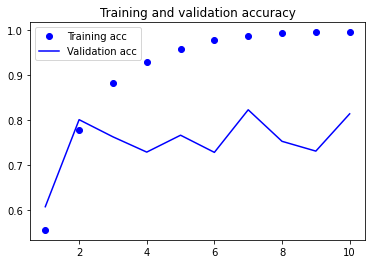

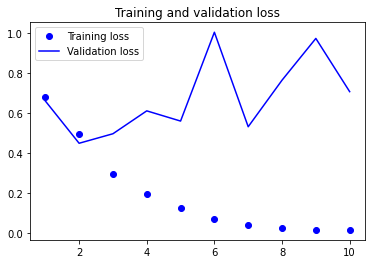

In [37]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
s